## Our first time series

Timestamp with various attributes that we can access to obtain information about the date.

Now, We'll create a week of data, iterate over the result, and obtain the dayofweek and `day_name()` for each date.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create the range of dates 
seven_days = pd.date_range(start = '2017-1-1', periods = 7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


## Create a time series of air quality data

We have prepared a data set with air quality data (ozone, pm25, and carbon monoxide for NYC, 2000-2017) for us to practice the use of `pd.to_datetime()`.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


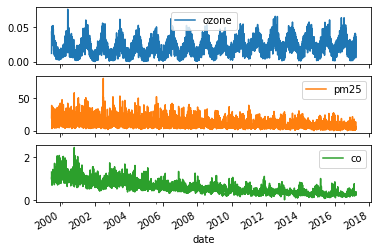

In [5]:
data = pd.read_csv('air_quality_data/nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data['date'] = pd.to_datetime(data['date'])

# Set date column as index
data.set_index('date', inplace = True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots = True)

plt.show()


`pandas` makes it easy to turn a DataFrame into a time series!

## Set and change time series frequency

Here, we are going to practice how to assign a frequency to a DateTimeIndex, and then change this frequency.

Now, we'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

We'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


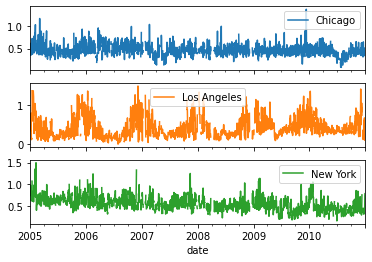

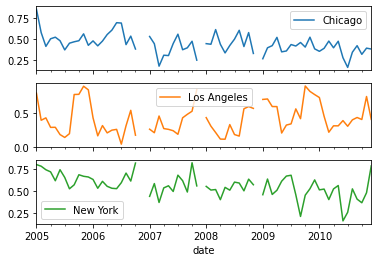

In [12]:
# Import co_cities.csv file 
co = pd.read_csv('air_quality_data/co_cities.csv')

# Convert the date column to datetime64
co['date'] = pd.to_datetime(co['date'])

# Set the date column as index
co.set_index('date', inplace = True)

# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq(freq='D')

# Plot the data
co.plot(subplots = True)
plt.show()


# Set frequency to monthly
co = co.asfreq(freq='M')

# Plot the data
co.plot(subplots = True)
plt.show()



Here, we can observe how does changing the frequency of the data affect the plot output.

## Compare annual stock price trends

Here, we are going to practice how to select sub-periods from a time series.

We'll use this to compare the performance for three years of Yahoo stock prices.

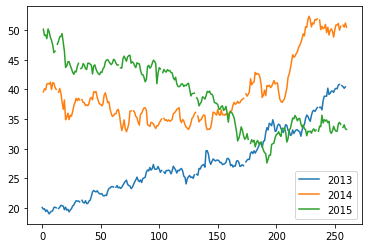

In [9]:
# Import data from yahoo.csv
yahoo = pd.read_csv('stock_data/yahoo.csv')

# Convert the date column to datetime64
yahoo['date'] = pd.to_datetime(yahoo['date'])

# Set the date column as index 
yahoo.set_index('date', inplace = True)

# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()


The plot we just created shows Yahoo's stock price in three different years.

## Shifting stock prices across time

`.shift()` allows us shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

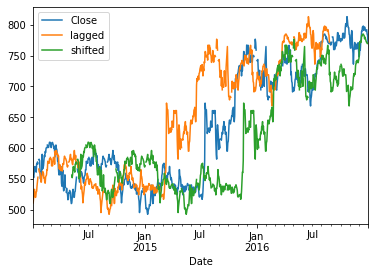

In [35]:
# Import data here
google = pd.read_csv('stock_data/google.csv', parse_dates = ['Date'], index_col = 'Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot()
plt.show()



## Calculating stock price changes

We have practiced how to calculate returns using current and shifted prices as input. Now We'll practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function `.diff()`.

In [16]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods = 30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price - yahoo.shifted_30

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods = 30)

# Inspect the last five rows of price
print(yahoo.tail(5))

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())


            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


There's usually more than one way to get to the same result when working with data.

## Plotting multi-period returns

Let's use `.pct_change()` to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

We'll be using Google stock prices from 2014-2016.

Ww loaded 'GOOG' stock prices for the years 2014-2016, set the frequency to calendar daily, and assigned the result to `google_2014_2016`.

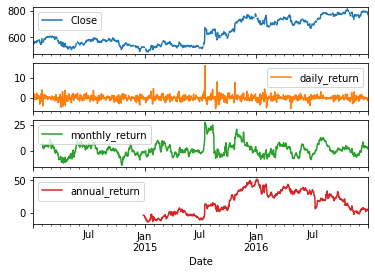

In [33]:
# Select period from 2014 - 2016
# Set time frequency as calender day
# drop lagged and shifted column
google_2014_2016 = google.loc['2014-01-01':'2016-12-31'].asfreq(freq = 'D').drop(['lagged', 'shifted'], axis = 1)

# Create daily_return
google_2014_2016['daily_return'] = google_2014_2016.Close.pct_change(periods = 1).mul(100)

# Create monthly_return
google_2014_2016['monthly_return'] = google_2014_2016.Close.pct_change(periods = 30).mul(100)

# Create annual_return
google_2014_2016['annual_return'] = google_2014_2016.Close.pct_change(periods = 360).mul(100)

# Plot the result
google_2014_2016.plot(subplots = True)

plt.show()


How do the returns for different periods compare?

## Compare the performance of several asset classes

We can easily compare several time series by normalizing their starting points to 100, and plot the result.

To broaden our perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


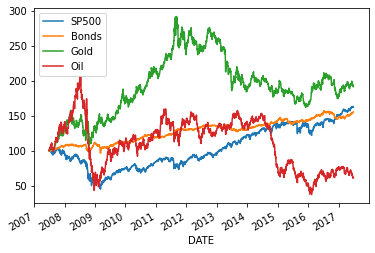

In [37]:
# Import data here
prices = pd.read_csv('stock_data/asset_classes.csv', parse_dates = ['DATE'], index_col = 'DATE')

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot()

plt.show()


Normalizing series is a common step in time series analysis.

## Comparing stock prices with a benchmark

We are also interested in how to compare the performance of various stocks against a benchmark. Now we'll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

- Company: Johnson & Johnson (JNJ), Exxon Mobil (XOM), JP Morgan Chase (JPM)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


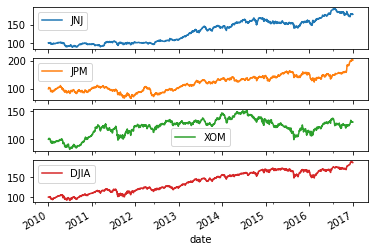

In [38]:
# Import stock prices and index here
stocks = pd.read_csv('stock_data/nyse.csv', parse_dates = ['date'], index_col = 'date')
dow_jones = pd.read_csv('stock_data/dow_jones.csv', parse_dates = ['date'], index_col = 'date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis = 1)
print(data.info())

# Normalize and plot your data here


data.div(data.iloc[0]).mul(100).plot(subplots = True)

plt.show()



Trusting `pandas` to align values means we can easily work with multiple series.

## Plot performance difference vs benchmark index

We are interested in how to calculate and plot the performance difference of a stock in percentage points relative to a benchmark index.

Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

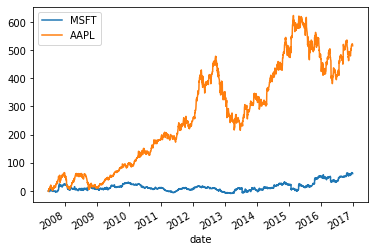

In [42]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('stock_data/msft_aapl.csv', parse_dates = ['date'], index_col = 'date')

# Import index here
sp500 = pd.read_csv('stock_data/sp500.csv', parse_dates = ['date'], index_col = 'date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis = 1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis = 0).plot()

plt.show()

Now we can compare these stocks to the overall market so we can more easily spot trends and outliers.

## Convert monthly to weekly data

`.reindex()` conforms an existing time series to a DateTimeIndex at a different frequency.

Let's practice this method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

In [43]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start = start, end = end, freq = 'M')

# Create and print monthly here
monthly = pd.Series(data = [1,2], index = monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start = start, end = end, freq = 'W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method = 'bfill'))
print(monthly.reindex(weekly_dates, method = 'ffill'))


2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


## Create weekly from monthly unemployment data

The civilian US unemployment rate is reported monthly. We may need more frequent data, but that's no problem because we just learned how to upsample a time series.

We'll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.

            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


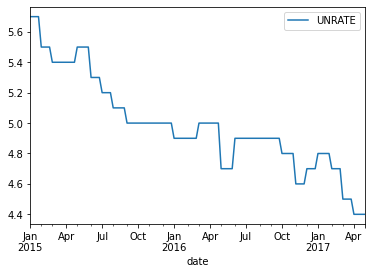

In [45]:
# Import data here
data = pd.read_csv('stock_data/unrate_2000.csv', parse_dates = ['date'], index_col = 'date')

# Show first five rows of weekly series
print(data.asfreq(freq = 'W').head(5))

# Show first five rows of weekly series with bfill option
print(data.asfreq(freq = 'W', method = 'bfill').head(5))

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq(freq = 'W', method = 'ffill')
print(weekly_ffill.head(5))

# Plot weekly_fill starting 2015 here 
weekly_ffill.loc['2015-01-01':].plot()
plt.show()

